# Iris - EDA

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization
from sklearn.preprocessing import StandardScaler  # For standardizing data
from sklearn.pipeline import make_pipeline  # For creating machine learning pipelines
import numpy as np  # For numerical operations
import pandas as pd  # For handling tabular data
import seaborn as sns  # For statistical data visualization

# Import the Iris dataset from sklearn
from sklearn.datasets import load_iris

# Load the Iris dataset as a Pandas DataFrame
iris = load_iris(as_frame=True)

# Combine the feature data (iris.data) and target labels (iris.target) into a single DataFrame
iris = pd.concat([iris.data, iris.target], axis=1)

# Rename the 'target' column to 'Species' for better readability
iris.rename(columns={"target": "Species"}, inplace=True)

# Create a mapping dictionary to convert numeric species labels into their corresponding names
m = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Apply the mapping to the 'Species' column, replacing numerical values with species names
iris['Species'] = iris['Species'].map(m)

# Display the final DataFrame (works in Jupyter Notebook or other interactive environments)
display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Pairplot

<Figure size 1000x1000 with 0 Axes>

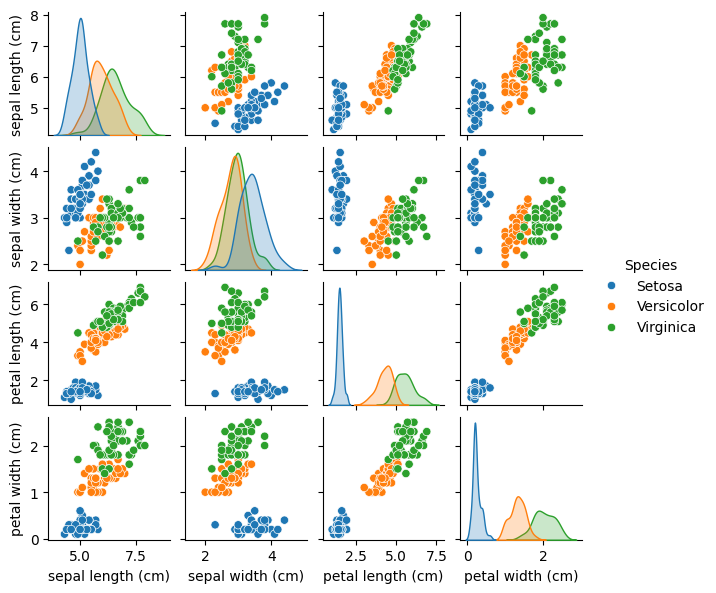

In [2]:
# Set the figure size for the plot
plt.figure(figsize=(10,10))  # Creates a figure with a 10x10-inch size

# Create a pairplot to visualize pairwise relationships between features
sns.pairplot(iris, hue='Species', height=1.5)  
# - `iris`: Uses the Iris dataset
# - `hue='Species'`: Colors data points based on species labels
# - `height=1.5`: Sets the size of individual plots

# Display the plot
plt.show()

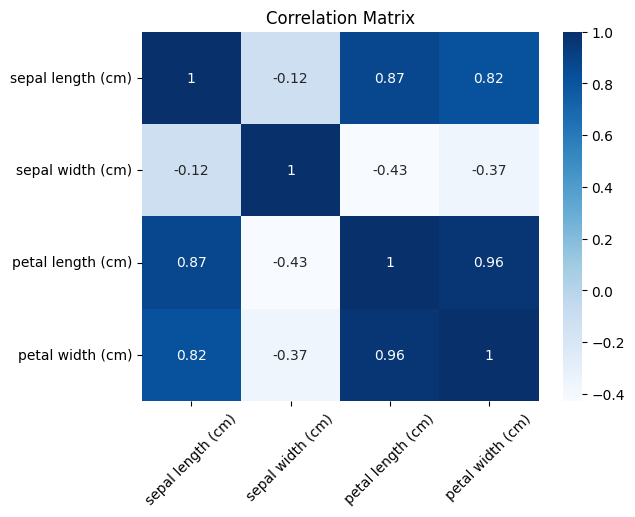

In [3]:
# Compute the correlation matrix for the first four columns (numerical features)
corr_matrix = iris.iloc[:, :4].corr()  
# - `iris.iloc[:, :4]`: Selects only the first four columns (sepal length, sepal width, petal length, petal width)
# - `.corr()`: Computes the Pearson correlation coefficients between these features

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Blues')  
# - `corr_matrix`: Uses the computed correlation matrix
# - `annot=True`: Displays correlation values inside the heatmap cells
# - `cmap='Blues'`: Uses a blue color scheme for better visual clarity

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


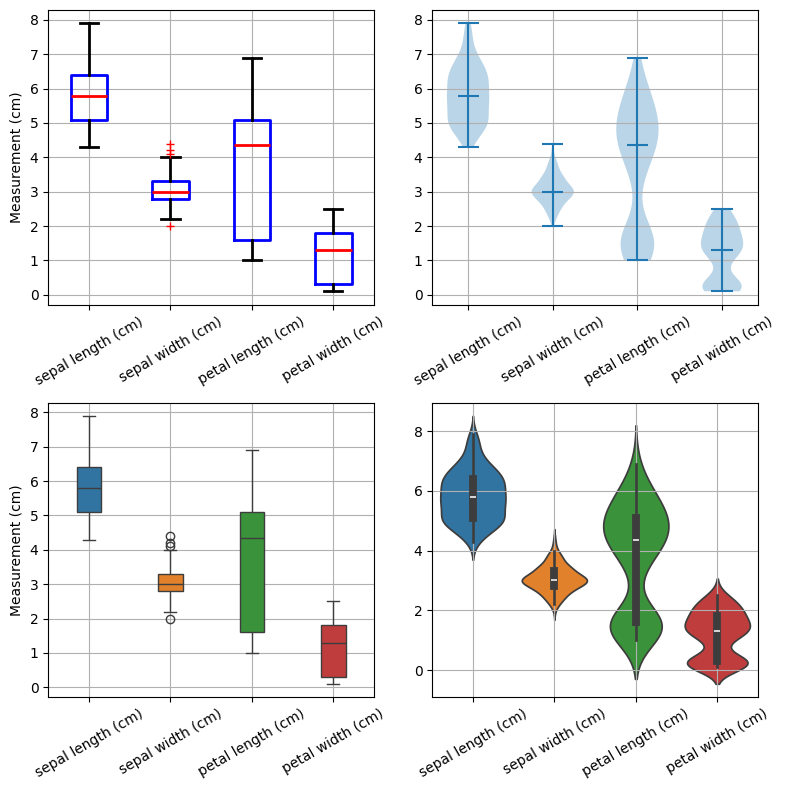

In [4]:
# Set the figure size for the entire plot
plt.figure(figsize=(8,8))

# Define the rotation angle for x-axis labels
angle = 30

# ================== Matplotlib Boxplot ==================
plt.subplot(221)  # Create a subplot in a 2x2 grid (1st plot)
plt.boxplot(iris.iloc[:, :4].to_numpy(),  # Convert first four columns to NumPy array for plotting
            boxprops=dict(linewidth=2, color='b'),  # Box outline properties (blue, thick)
            medianprops=dict(linewidth=2, color='r'),  # Median line properties (red, thick)
            whiskerprops=dict(linewidth=2, color='k'),  # Whisker properties (black, thick)
            capprops=dict(linewidth=2, color='k'),  # Cap properties (black, thick)
            flierprops=dict(marker='+', markeredgecolor='r'))  # Outliers (flier) properties (red, '+')

plt.ylabel('Measurement (cm)')  # Label for y-axis
plt.xticks(np.arange(4)+1,  # Set x-axis labels at positions 1 to 4
           labels=iris.columns.values[:4],  # Use feature names for x-axis
           rotation=angle)  # Rotate labels for better visibility
plt.grid()  # Add grid lines

# ================== Matplotlib Violin Plot ==================
plt.subplot(222)  # Create a subplot in a 2x2 grid (2nd plot)
plt.violinplot(iris.iloc[:, :4].to_numpy(),  # Convert first four columns to NumPy array
               showmeans=False,  # Do not show mean marker
               showmedians=True)  # Show median line

plt.xticks(np.arange(4)+1,  # Set x-axis labels
           labels=iris.columns.values[:4],  # Use feature names for x-axis
           rotation=angle)  # Rotate labels
plt.grid()  # Add grid lines

# ================== Seaborn Boxplot ==================
plt.subplot(223)  # Create a subplot in a 2x2 grid (3rd plot)
sns.boxplot(data=iris, width=0.3)  # Create a boxplot using seaborn (width controls box width)
plt.xticks(rotation=angle)  # Rotate x-axis labels
plt.ylabel('Measurement (cm)')  # Label for y-axis
plt.grid()  # Add grid lines

# ================== Seaborn Violin Plot ==================
plt.subplot(224)  # Create a subplot in a 2x2 grid (4th plot)
sns.violinplot(data=iris)  # Create a violin plot using seaborn
plt.xticks(rotation=angle)  # Rotate x-axis labels
plt.grid()  # Add grid lines

# ================== Layout Adjustments ==================
plt.tight_layout()  # Automatically adjust subplot layout to prevent overlap
plt.show()  # Display the figure

,Species,Features,Measurements
0,Setosa,sepal length (cm),5.1
1,Setosa,sepal length (cm),4.9
2,Setosa,sepal length (cm),4.7
3,Setosa,sepal length (cm),4.6
4,Setosa,sepal length (cm),5.0
...,...,...,...
595,Virginica,petal width (cm),2.3
596,Virginica,petal width (cm),1.9
597,Virginica,petal width (cm),2.0
598,Virginica,petal width (cm),2.3


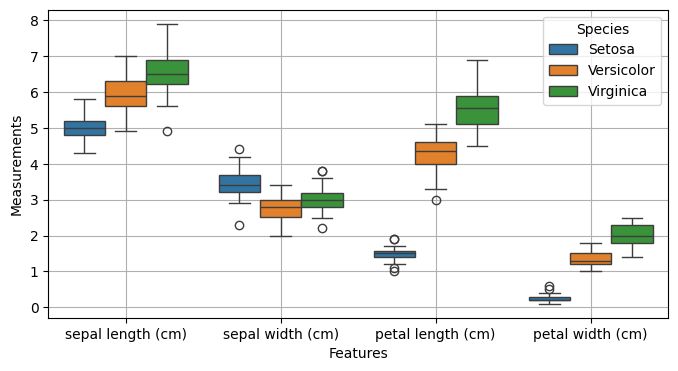

In [5]:
# Reshape the iris DataFrame from wide format to long format using pandas' melt function
melted_iris = pd.melt(iris, id_vars=["Species"], value_vars=iris.columns.values[:4])
# - `id_vars=["Species"]`: Keeps the 'Species' column unchanged
# - `value_vars=iris.columns.values[:4]`: Selects the first four feature columns (sepal and petal measurements)
# - This transformation creates a long-form DataFrame where each row represents a single measurement for a feature

# Rename the columns for better readability
melted_iris.columns = ['Species', 'Features', 'Measurements']

# Display the reshaped DataFrame (works in Jupyter Notebook or other interactive environments)
display(melted_iris)

# Set the figure size for the plot
plt.figure(figsize=(8,4))

# Create a boxplot using Seaborn to visualize the distribution of measurements across species
sns.boxplot(data=melted_iris, width=0.8,  
            x="Features", y="Measurements", hue='Species')
# - `data=melted_iris`: Uses the transformed dataset
# - `width=0.8`: Adjusts the width of the boxes
# - `x="Features"`: Categories (sepal length, sepal width, etc.) are plotted on the x-axis
# - `y="Measurements"`: Corresponding measurements are plotted on the y-axis
# - `hue='Species'`: Colors the boxplots based on the species for comparison

# Adjust the font size of axis labels for better readability
plt.rc('axes', labelsize=15)

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()

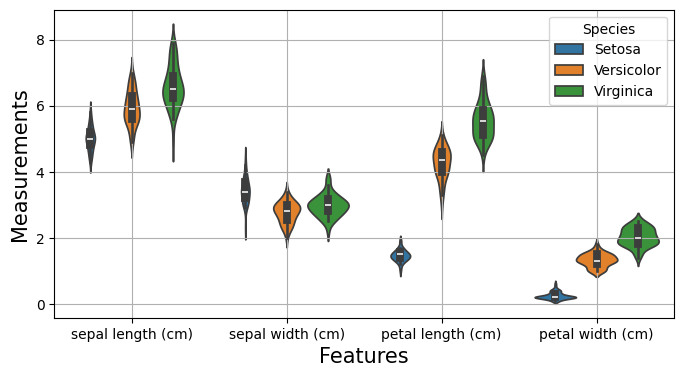

In [6]:
# Set the figure size for better readability
plt.figure(figsize=(8,4))

# Create a violin plot to visualize the distribution of measurements across species
sns.violinplot(data=melted_iris, width=0.8,  
               x="Features", y="Measurements", hue='Species')
# - `data=melted_iris`: Uses the melted DataFrame (long format)
# - `width=0.8`: Adjusts the width of the violin plots
# - `x="Features"`: Feature names (sepal length, sepal width, etc.) are plotted on the x-axis
# - `y="Measurements"`: Corresponding numerical measurements are plotted on the y-axis
# - `hue='Species'`: Colors the violin plots based on species for comparison

# Adjust the font size of axis labels for better readability
plt.rc('axes', labelsize=15)

# Add grid lines to improve visualization
plt.grid()

# Display the plot
plt.show()